# ***FOOD MART ANALYSIS***

# **Import Libraries**

In [9]:
pip install scikit-learn-extra

Note: you may need to restart the kernel to use updated packages.


In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn_extra.cluster import KMedoids
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage, dendrogram, fcluster

# **Read Data**

In [13]:
#Load Excel File into a dataframe
data = pd.read_excel('/kaggle/input/foodmart-dataset/StoresData.xlsx')
data                

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),State,State (Num),Age (Yrs),GrossProfit,...,Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel,HomeDel (Num),Basket:2013,Basket:2014
0,1,12.5,2.3,60,Mall,2,NSW,1,10,0.712,...,0,33,12,2,38,46,Del:No,0,171,178
1,2,14.5,2.7,69,Mall,2,Vic,2,8,0.091,...,0,33,16,1,38,73,Del:No,0,168,178
2,3,19.0,3.1,79,Country,3,Vic,2,7,1.075,...,0,30,9,2,39,64,Del:No,0,180,188
3,4,18.2,2.6,66,Mall,2,Qld,3,7,1.372,...,0,29,9,2,38,66,Del:Yes,1,173,180
4,5,7.6,2.0,51,Strip,1,Qld,3,15,2.148,...,0,36,4,3,40,29,Del:No,0,166,171
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,14.1,3.3,88,Strip,1,SA,4,5,0.504,...,1,42,9,3,35,63,Del:No,0,163,172
146,147,8.1,1.7,58,Country,3,NSW,1,19,0.447,...,0,43,12,3,42,35,Del:No,0,178,186
147,148,13.6,2.9,66,Strip,1,WA,5,17,2.620,...,0,39,8,3,45,48,Del:No,0,166,172
148,149,10.0,2.0,55,Mall,2,WA,5,8,1.168,...,0,52,13,3,40,34,Del:No,0,174,182


# **Understanding & Exploring the data**

In [14]:
#summary of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Store No.      150 non-null    int64  
 1   Sales $m       150 non-null    float64
 2   Wages $m       150 non-null    float64
 3   No. Staff      150 non-null    int64  
 4   Location       150 non-null    object 
 5   Loc'n (Num)    150 non-null    int64  
 6   State          150 non-null    object 
 7   State (Num)    150 non-null    int64  
 8   Age (Yrs)      150 non-null    int64  
 9   GrossProfit    150 non-null    float64
 10  Adv.$'000      150 non-null    int64  
 11  Competitors    150 non-null    int64  
 12  HrsTrading     150 non-null    int64  
 13  Sundays        150 non-null    object 
 14  Sundays (Num)  150 non-null    int64  
 15  Mng-Sex        150 non-null    object 
 16  Mng-Sex (Num)  150 non-null    int64  
 17  Mng-Age        150 non-null    int64  
 18  Mng-Exp   

In [15]:
#Checking for missing
print(f"Number of nulls: {data.isnull().sum().sum()}")
#Checking for duplicates
print(f"Number of duplicates: {data.duplicated().sum()}")
#code for dropping if needed
#data = data.drop_duplicates()
#print(f"Number of duplicates after dropping: {data.duplicated().sum()}")

Number of nulls: 0
Number of duplicates: 0


In [16]:
#statistics of the data
data.describe()

,Store No.,Sales $m,Wages $m,No. Staff,Loc'n (Num),State (Num),Age (Yrs),GrossProfit,Adv.$'000,Competitors,...,Sundays (Num),Mng-Sex (Num),Mng-Age,Mng-Exp,Mng-Train,Union%,Car Spaces,HomeDel (Num),Basket:2013,Basket:2014
count,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,...,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,11.659333,2.376667,61.493333,1.913333,3.033333,8.846667,1.009953,147.273333,2.506667,...,0.620000,0.166667,38.420000,9.253333,2.813333,37.786667,44.186667,0.300000,171.806667,178.846667
std,43.445368,3.570989,0.567866,14.605206,0.767954,1.894594,5.442483,0.645794,67.994265,1.744586,...,0.487013,0.373927,7.337748,3.985185,1.183707,4.899783,22.162725,0.459793,8.005616,8.637158
min,1.000000,5.900000,1.500000,35.000000,1.000000,1.000000,1.000000,0.018000,20.000000,0.000000,...,0.000000,0.000000,27.000000,1.000000,1.000000,24.000000,8.000000,0.000000,156.000000,162.000000
25%,38.250000,8.825000,1.900000,51.000000,1.000000,1.000000,4.250000,0.511000,101.000000,1.000000,...,0.000000,0.000000,33.000000,7.000000,2.000000,35.000000,26.000000,0.000000,164.000000,171.000000
50%,75.500000,10.950000,2.200000,58.000000,2.000000,3.000000,7.500000,0.975000,130.500000,2.000000,...,1.000000,0.000000,37.000000,9.000000,3.000000,38.000000,39.500000,0.000000,172.000000,179.000000
75%,112.750000,14.000000,2.700000,69.750000,2.750000,4.000000,12.000000,1.415000,196.750000,4.000000,...,1.000000,0.000000,43.000000,12.000000,3.000000,41.000000,58.000000,1.000000,178.000000,185.000000
max,150.000000,23.500000,3.900000,117.000000,3.000000,8.000000,24.000000,2.872000,369.000000,7.000000,...,1.000000,1.000000,61.000000,21.000000,6.000000,50.000000,114.000000,1.000000,201.000000,204.000000


# **Removing Outliers**

In [17]:
# A list of the columns we will check for outliers
numerical_columns = [
    "Sales $m", "Wages $m", "No. Staff", "Age (Yrs)", "GrossProfit", "Adv.$'000",
    "Competitors", "HrsTrading", "Mng-Age", "Mng-Exp", "Union%", "Car Spaces",
    "Basket:2013", "Basket:2014"
]
# Creating a copy of the data
filtered_data = data.copy()
# Iterating through each column to remove outliers
for col in numerical_columns:
    # Calculate Q1, Q3, and IQR
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    # Defining lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    # Filter out rows whose value is outside the bounds
    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]
print("Outliers removed successfully.")

Outliers removed successfully.


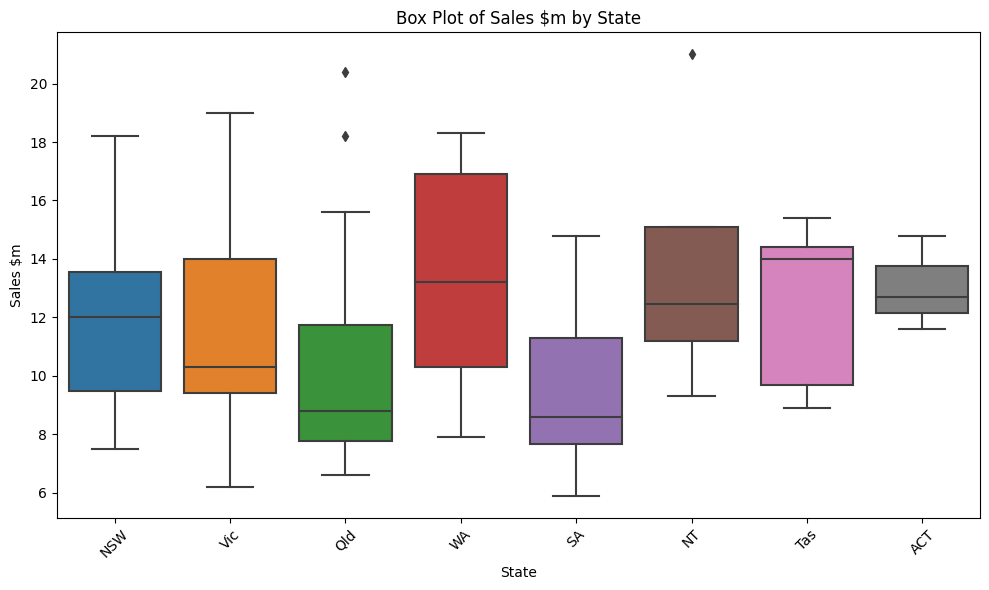

In [20]:
#to compare the distribution of Sales $m across cluster State.
plt.figure(figsize=(10, 6)) #set the plot size (width,height)
sns.boxplot(x='State', y='Sales $m', data=filtered_data) #create a box plot using  Seaborn library
plt.title('Box Plot of Sales $m by State')#Add a title to the plot
plt.xlabel('State') #label the x-axis
plt.ylabel('Sales $m') #label the y-axis
plt.xticks(rotation=45) # rotate the x-axis labels by 45 degrees to be easier to be read(if they are long)
plt.tight_layout() #Adjust the layout to ensure that everything fits in the figure without overlapping
plt.show()#display the plot

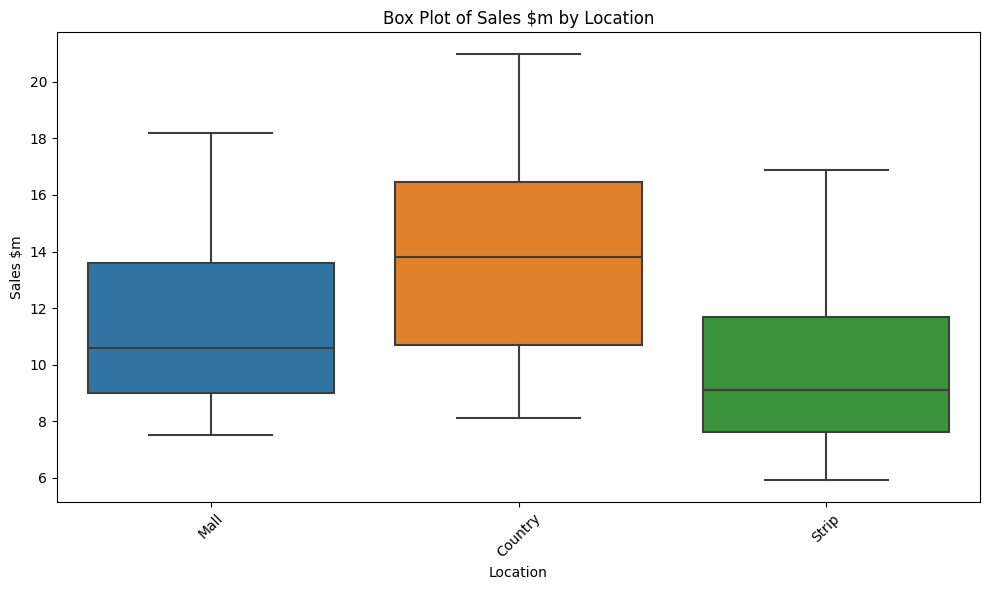

In [21]:
#to compare the distribution of Sales $m across cluster Location.
plt.figure(figsize=(10, 6)) #Set the plot size in inches
sns.boxplot(x='Location', y='Sales $m', data=filtered_data)#box plot using seaborn
plt.title('Box Plot of Sales $m by Location')#plot title
plt.xlabel('Location')#label for x-axis
plt.ylabel('Sales $m')#label for y-axis
plt.xticks(rotation=45) #rotate by 45 deg to be easier to be read
plt.tight_layout() #make sure everything fits in the figure
plt.show()#display it

# **Label Encoding**

In [23]:
# List of string columns to encode
categorical_columns = ['Location','Sundays','Mng-Sex', 'State', 'HomeDel']
# Apply Label Encoding to each => Assigns each category in a column a unique integer(stating from 0)
label_encoder = LabelEncoder()
for col in categorical_columns: #loop that will iterate on each column
    filtered_data[col] = label_encoder.fit_transform(filtered_data[col])
print("Label encoding applied to:", categorical_columns)

Label encoding applied to: ['Location', 'Sundays', 'Mng-Sex', 'State', 'HomeDel']


# **Normalization**

In [24]:
# Dfine numerical column that will be normalized
numerical_columns = [
    "Sales $m", "Wages $m", "No. Staff", "Age (Yrs)", "GrossProfit", "Adv.$'000",
    "Competitors", "HrsTrading", "Mng-Age", "Mng-Exp", "Union%", "Car Spaces",
    "Basket:2013", "Basket:2014", "Location"  # <--- now included
]
# Initialize the MinMaxScaler from sklearn.processing
#normalize the data between 0 & 1
scaler = MinMaxScaler()
df_normalized = filtered_data.copy()# Create a copy of the cleaned data => to avoid modifying the original dataframe
df_normalized[numerical_columns] = scaler.fit_transform(filtered_data[numerical_columns])#apply the normalization
print(f"Normalization applied successfully.")

Normalization applied successfully.


In [25]:
#display the first 5 rows
print(df_normalized.head())

   Store No.  Sales $m  Wages $m  No. Staff  Location  Loc'n (Num)  State  \
0          1  0.437086  0.380952   0.446429       0.5            2      1   
1          2  0.569536  0.571429   0.607143       0.5            2      6   
2          3  0.867550  0.761905   0.785714       0.0            3      6   
3          4  0.814570  0.523810   0.553571       0.5            2      3   
4          5  0.112583  0.238095   0.285714       1.0            1      3   

   State (Num)  Age (Yrs)  GrossProfit  ...  Mng-Sex (Num)   Mng-Age  \
0            1       0.40     0.266104  ...              0  0.206897   
1            2       0.30     0.027991  ...              0  0.206897   
2            2       0.25     0.405291  ...              0  0.103448   
3            3       0.25     0.519172  ...              0  0.068966   
4            3       0.65     0.816718  ...              0  0.310345   

    Mng-Exp  Mng-Train    Union%  Car Spaces  HomeDel  HomeDel (Num)  \
0  0.611111          2  0.478261

In [26]:
#display the data types of the normalized data
print(df_normalized.dtypes)

Store No.          int64
Sales $m         float64
Wages $m         float64
No. Staff        float64
Location         float64
Loc'n (Num)        int64
State              int64
State (Num)        int64
Age (Yrs)        float64
GrossProfit      float64
Adv.$'000        float64
Competitors      float64
HrsTrading       float64
Sundays            int64
Sundays (Num)      int64
Mng-Sex            int64
Mng-Sex (Num)      int64
Mng-Age          float64
Mng-Exp          float64
Mng-Train          int64
Union%           float64
Car Spaces       float64
HomeDel            int64
HomeDel (Num)      int64
Basket:2013      float64
Basket:2014      float64
dtype: object


# **Correlation Matrix**

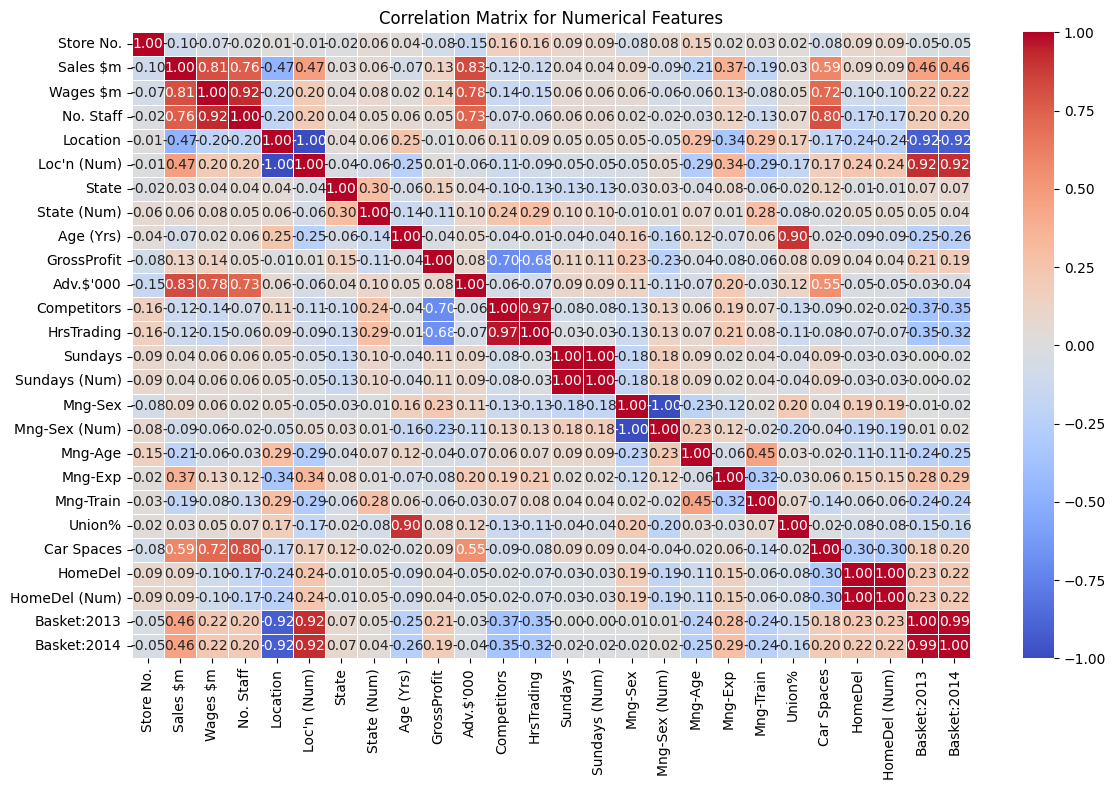

In [27]:
#compute the correlation matrix
correlation_matrix = df_normalized.corr(numeric_only=True) #numeric_only => to ensure that only numerical columns are taken and non numerical are ignored
plt.figure(figsize=(12, 8)) #set the plot size
#use the seaborn library to draw the heatmap
# annot=> to ensure that each cell is annotated with the numerical value of the correlation coefficient
#cmap=> the color of the heatmap
#fmt=>format the numerical values in the heatmap to 2 decimal places
#linewidth=> sets the width of the lines separating the cells in the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix for Numerical Features') #plot title
plt.tight_layout() #add spacing to avoid overlapping
plt.show()#display the plot

# **Weak Correlation**

In [28]:
# Define the target column
target_column = 'Sales $m'
# Compute correlations with the target column
correlations_with_target = correlation_matrix[target_column].abs()
# Identify weakly correlated columns (threshold = 0.1)
# .index.tolist() => .index to extract the names of the feature 
#.tolist()=>converts the resulting index object to a python list
weakly_correlated_columns = correlations_with_target[correlations_with_target < 0.1].index.tolist()
print("Columns weakly correlated with the target column (Sales $m):")
print(weakly_correlated_columns)

Columns weakly correlated with the target column (Sales $m):
['State', 'State (Num)', 'Age (Yrs)', 'Sundays', 'Sundays (Num)', 'Mng-Sex', 'Mng-Sex (Num)', 'Union%', 'HomeDel', 'HomeDel (Num)']


In [29]:
#Remove weakly correlated columns to improve model performance
df_normalized.drop(columns=weakly_correlated_columns)

,Store No.,Sales $m,Wages $m,No. Staff,Location,Loc'n (Num),GrossProfit,Adv.$'000,Competitors,HrsTrading,Mng-Age,Mng-Exp,Mng-Train,Car Spaces,Basket:2013,Basket:2014
0,1,0.437086,0.380952,0.446429,0.5,2,0.266104,0.518900,0.428571,0.395833,0.206897,0.611111,2,0.422222,0.500000,0.50000
1,2,0.569536,0.571429,0.607143,0.5,2,0.027991,0.663230,0.714286,0.645833,0.206897,0.833333,1,0.722222,0.400000,0.50000
2,3,0.867550,0.761905,0.785714,0.0,3,0.405291,0.807560,0.285714,0.270833,0.103448,0.444444,2,0.622222,0.800000,0.81250
3,4,0.814570,0.523810,0.553571,0.5,2,0.519172,0.917526,0.142857,0.135417,0.068966,0.444444,2,0.644444,0.566667,0.56250
4,5,0.112583,0.238095,0.285714,1.0,1,0.816718,0.316151,0.000000,0.000000,0.310345,0.166667,3,0.233333,0.333333,0.28125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,0.543046,0.857143,0.946429,1.0,1,0.186350,0.800687,0.571429,0.541667,0.517241,0.444444,3,0.611111,0.233333,0.31250
146,147,0.145695,0.095238,0.410714,0.0,3,0.164494,0.000000,0.571429,0.697917,0.551724,0.611111,3,0.300000,0.733333,0.75000
147,148,0.509934,0.666667,0.553571,1.0,1,0.997699,0.285223,0.285714,0.312500,0.413793,0.388889,3,0.444444,0.333333,0.31250
148,149,0.271523,0.238095,0.357143,0.5,2,0.440951,0.343643,0.428571,0.437500,0.862069,0.666667,3,0.288889,0.600000,0.62500


# **Splitting the data**

In [30]:
X=df_normalized.drop(columns=['Sales $m']) #remove the target column
y=df_normalized['Sales $m']#target column
# Split the dataset into training and testing 
# x=> input features
#y=> target variable
#random_state=42 =>controls the randomness of splitting to ensure that the same random split is generated each time you run the code
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Print the size of the training and testing data
print("Train data size:", X_train.shape)
print("Test data size:", X_test.shape)

Train data size: (104, 25)
Test data size: (27, 25)


# **KMedoids**

In [31]:
k2medoids=KMedoids(n_clusters=2, random_state=42).fit(df_normalized) #.fit()=> apply the kmedoid to normalized data
clusters2=k2medoids.cluster_centers_ #coordinates of the data points
labels2=k2medoids.labels_ #cluster labels of eac data point
print("K = 2 ") #print no of clusters
print("Labels: ",labels2) #print cluster labels
print("Clusters: ",clusters2) #print clusters centers/medoids
# Create a copy before adding cluster column to avoid changing the original data
X_kmed2 = df_normalized.copy()
X_kmed2['KMedoidsCluster'] = labels2 #add a new column that contains the cluster labels(0 or 1)
print("Labels: ", labels2)
print("Cluster Centers:\n", pd.DataFrame(clusters2, columns=df_normalized.columns)) #convert cluster centers into a data frame

K = 2 
Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Clusters:  [[1.14000000e+02 1.32450331e-01 1.42857143e-01 1.25000000e-01
  5.00000000e-01 2.00000000e+00 3.00000000e+00 3.00000000e+00
  1.00000000e-01 4.85046012e-01 1.64948454e-01 1.42857143e-01
  1.87500000e-01 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 3.44827586e-01 2.77777778e-01 3.00000000e+00
  3.91304348e-01 1.00000000e-01 0.00000000e+00 0.00000000e+00
  5.33333333e-01 4.68750000e-01]
 [4.10000000e+01 2.05298013e-01 1.90476190e-01 3.21428571e-01
  5.00000000e-01 2.00000000e+00 3.00000000e+00 3.00000000e+00
  5.50000000e-01 3.15184049e-01 2.71477663e-01 4.28571429e-01
  3.95833333e-01 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 3.10344828e-01 4.44444444e-01 2.0000

In [32]:
# iterate through each cluster & print the information for each cluster
for cluster_num in range(2): # Iterating through each cluster
    cluster_points = X_kmed2[X_kmed2['KMedoidsCluster'] == cluster_num] # Filter points belonging to the current cluster
    print(f"\nCluster {cluster_num + 1}:") #print the cluster name
    print(cluster_points[['Sales $m', 'Wages $m', 'GrossProfit', 'No. Staff', 'HrsTrading', 'Mng-Age']]) # Adjust columns as needed


Cluster 1:
     Sales $m  Wages $m  GrossProfit  No. Staff  HrsTrading   Mng-Age
77   0.450331  0.333333     0.059049   0.285714    1.000000  0.206897
78   0.536424  0.714286     0.385736   0.696429    0.062500  0.413793
79   0.231788  0.238095     0.585506   0.267857    0.395833  0.482759
80   0.536424  0.476190     0.104678   0.625000    0.625000  0.137931
81   0.662252  0.476190     0.028374   0.553571    0.677083  0.551724
..        ...       ...          ...        ...         ...       ...
145  0.543046  0.857143     0.186350   0.946429    0.541667  0.517241
146  0.145695  0.095238     0.164494   0.410714    0.697917  0.551724
147  0.509934  0.666667     0.997699   0.553571    0.312500  0.413793
148  0.271523  0.238095     0.440951   0.357143    0.437500  0.862069
149  0.377483  0.333333     0.005368   0.446429    0.656250  0.275862

[66 rows x 6 columns]

Cluster 2:
    Sales $m  Wages $m  GrossProfit  No. Staff  HrsTrading   Mng-Age
0   0.437086  0.380952     0.266104   0.4464

In [33]:
k3medoids=KMedoids(n_clusters=3, random_state=42).fit(df_normalized) #.fit()=> apply the kmedoid to normalized data
clusters3=k3medoids.cluster_centers_ #coordinates of the data points
labels3=k3medoids.labels_#cluster labels of eac data point
print("K = 3 ") #print no of clusters
print("Labels: ",labels3) #print cluster labels
print("Clusters: ",clusters3) #print clusters ceters/medoids
# Create a copy before adding cluster column to avoid changing the original data
X_kmed3 = df_normalized.copy()
X_kmed3['KMedoidsCluster'] = labels3  #add a new column that contains the cluster labels(0 or 1)
print("Labels: ", labels3)
print("Cluster Centers:\n", pd.DataFrame(clusters3, columns=df_normalized.columns)) #convert cluster centers into a data frame

K = 3 
Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
Clusters:  [[8.40000000e+01 1.45695364e-01 1.90476190e-01 2.50000000e-01
  5.00000000e-01 2.00000000e+00 3.00000000e+00 3.00000000e+00
  7.00000000e-01 3.70015337e-01 1.75257732e-01 2.85714286e-01
  4.16666667e-01 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 4.13793103e-01 3.33333333e-01 3.00000000e+00
  7.82608696e-01 1.66666667e-01 0.00000000e+00 0.00000000e+00
  6.33333333e-01 6.25000000e-01]
 [3.10000000e+01 3.50993377e-01 5.23809524e-01 6.25000000e-01
  1.00000000e+00 1.00000000e+00 4.00000000e+00 4.00000000e+00
  6.00000000e-01 3.90337423e-01 6.08247423e-01 0.00000000e+00
  0.00000000e+00 1.00000000e+00 1.00000000e+00 1.00000000e+00
  0.00000000e+00 2.75862069e-01 2.22222222e-01 3.0000

In [34]:
# Print each cluster with its points for KMedoids
for cluster_num in range(3): # Iterating through each cluster
    cluster_points = X_kmed3[X_kmed3['KMedoidsCluster'] == cluster_num] # Filter points belonging to the current cluster
    print(f"\nCluster {cluster_num + 1}:")
    print(cluster_points[['Sales $m', 'Wages $m', 'GrossProfit', 'No. Staff', 'HrsTrading', 'Mng-Age']]) # Adjust columns as needed


Cluster 1:
     Sales $m  Wages $m  GrossProfit  No. Staff  HrsTrading   Mng-Age
57   0.178808  0.142857     0.623466   0.232143    0.479167  0.241379
58   0.741722  0.666667     0.307132   0.732143    0.208333  0.862069
59   0.629139  0.428571     0.615414   0.410714    0.166667  0.620690
60   0.337748  0.333333     0.408742   0.285714    0.302083  0.896552
61   0.642384  0.714286     0.553298   0.571429    0.197917  0.586207
62   0.112583  0.142857     0.197086   0.267857    0.500000  0.655172
65   0.430464  0.809524     0.428298   0.732143    0.270833  0.517241
66   0.496689  0.571429     0.483896   0.642857    0.250000  0.034483
67   0.523179  0.476190     0.227761   0.500000    0.458333  0.275862
68   0.377483  0.380952     0.276457   0.357143    0.437500  0.551724
69   0.390728  0.523810     0.430982   0.375000    0.270833  0.275862
70   0.430464  0.523810     0.559049   0.392857    0.197917  0.034483
71   0.145695  0.857143     0.202454   0.785714    0.593750  1.000000
72   0.2

In [35]:
k4medoids=KMedoids(n_clusters=4, random_state=42).fit(df_normalized)#.fit()=> apply the kmedoid to normalized data
clusters4=k4medoids.cluster_centers_  #coordinates of the data points
labels4=k4medoids.labels_#cluster labels of eac data point
print("K = 4 ") #print no of clusters
print("Labels: ",labels4) #print clusters ceters/medoids
print("Clusters: ",clusters4) #print clusters ceters/medoids
# Create a copy before adding cluster column to avoid changing the original data
# Create a copy before adding cluster column
X_kmed4 = df_normalized.copy()
X_kmed4['KMedoidsCluster'] = labels4 #add a new column that contains the cluster labels(0 or 1)
print("Labels: ", labels4)
print("Cluster Centers:\n", pd.DataFrame(clusters4, columns=df_normalized.columns)) #convert cluster centers into a data frame

K = 4 
Labels:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3]
Clusters:  [[6.20000000e+01 6.42384106e-01 7.14285714e-01 5.71428571e-01
  0.00000000e+00 3.00000000e+00 3.00000000e+00 3.00000000e+00
  5.50000000e-01 5.53297546e-01 5.49828179e-01 1.42857143e-01
  1.97916667e-01 0.00000000e+00 0.00000000e+00 1.00000000e+00
  0.00000000e+00 5.86206897e-01 5.00000000e-01 3.00000000e+00
  5.65217391e-01 4.00000000e-01 1.00000000e+00 1.00000000e+00
  8.33333333e-01 7.81250000e-01]
 [2.10000000e+01 3.44370861e-01 4.28571429e-01 5.35714286e-01
  5.00000000e-01 2.00000000e+00 3.00000000e+00 3.00000000e+00
  5.00000000e-02 5.40644172e-02 4.26116838e-01 8.57142857e-01
  1.00000000e+00 1.00000000e+00 1.00000000e+00 0.00000000e+00
  1.00000000e+00 6.89655172e-01 8.33333333e-01 3.0000

In [36]:
# Print each cluster with its points for KMedoids
for cluster_num in range(4): # Iterating through each cluster
    cluster_points = X_kmed4[X_kmed4['KMedoidsCluster'] == cluster_num] # Filter points belonging to the current cluster
    print(f"\nCluster {cluster_num + 1}:")
    print(cluster_points[['Sales $m', 'Wages $m', 'GrossProfit', 'No. Staff', 'HrsTrading', 'Mng-Age']]) # Adjust columns as needed


Cluster 1:
    Sales $m  Wages $m  GrossProfit  No. Staff  HrsTrading   Mng-Age
41  0.655629  0.952381     0.376534   0.946429    0.333333  0.448276
42  0.536424  0.476190     0.437500   0.428571    0.281250  0.551724
44  0.562914  0.761905     0.351994   0.857143    0.406250  0.620690
45  0.589404  1.000000     0.747699   1.000000    0.145833  0.206897
46  0.410596  0.476190     0.965491   0.375000    0.125000  0.310345
47  0.139073  0.190476     0.152991   0.285714    0.531250  0.310345
48  0.165563  0.238095     0.491181   0.375000    0.260417  0.551724
49  0.311258  0.238095     0.435966   0.285714    0.270833  0.275862
50  0.331126  0.380952     0.759586   0.375000    0.000000  0.758621
52  0.238411  0.476190     0.274540   0.482143    0.406250  0.586207
53  0.059603  0.095238     0.495399   0.160714    0.145833  0.068966
54  0.086093  0.047619     0.330138   0.107143    0.500000  0.413793
55  0.357616  0.523810     0.566718   0.660714    0.125000  0.310345
56  0.231788  0.238095

# **Hierarchical Clustering**

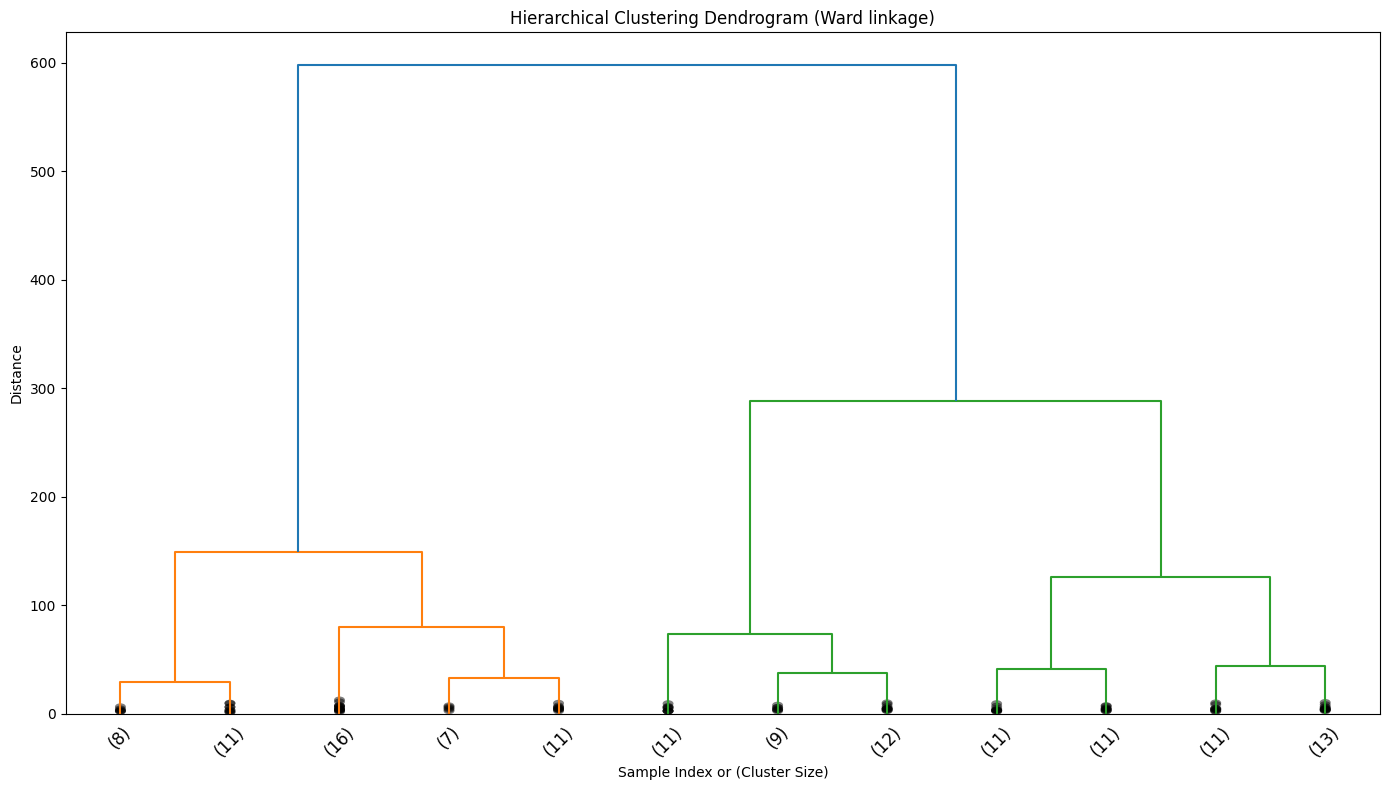

In [37]:
# Performs hierarchical clustering on the dataset df_normalized using the Ward linkage method
Z = linkage(df_normalized, method='ward')
plt.figure(figsize=(14, 8))
# truncate_mode='lastp': Truncates the dendrogram to show only the last p clusters (rather than the entire tree)useful when the dataset is large
# p=12: Limits the number of clusters displayed on the dendrogram to the last 12 clusters. You can adjust this based on the number of clusters you want to show
# leaf_rotation=45.: Rotates the leaf labels (cluster labels) by 45 degrees to make them more readable
# leaf_font_size=12.: Sets the font size for the leaf labels to 12
# show_contracted=True: Display the contracted clusters (groups of clusters) that have been merged at higher levels
dendrogram(Z, truncate_mode='lastp', p=12, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
# Plots the dendrogram
plt.title("Hierarchical Clustering Dendrogram (Ward linkage)")
plt.xlabel("Sample Index or (Cluster Size)")
plt.ylabel("Distance")
plt.tight_layout()
plt.show()

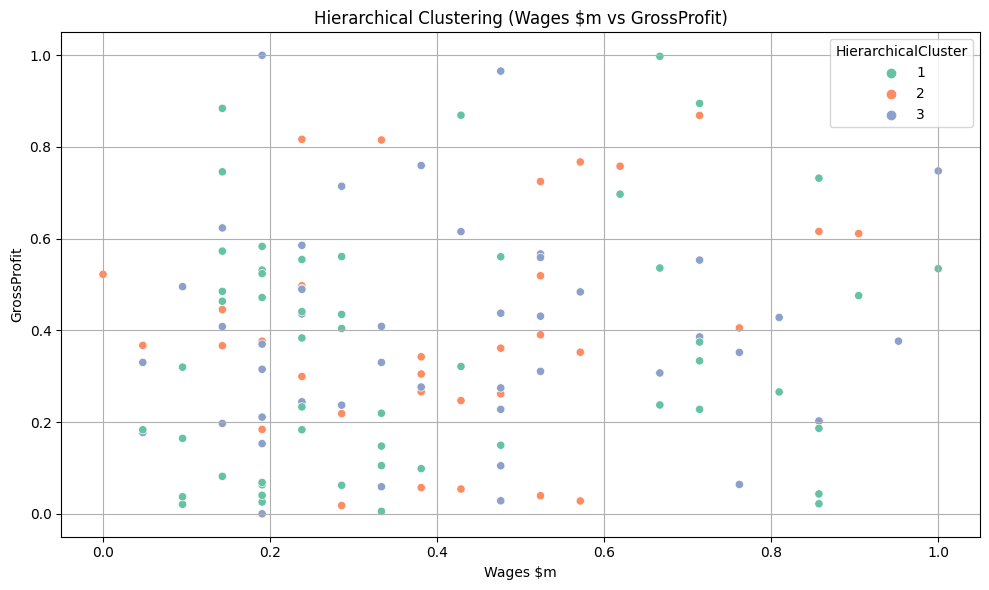

In [38]:
#  Scatter plot that visualizes the data points with their respective cluster labels
# Each point representing a sample from your dataset
n_clusters = 3  # You can change based on the dendrogram
# criterion='maxclust' means the function will form 'n_clusters' clusters by cutting the tree at the appropriate level to achieve that number of clusters
hierarchical_labels = fcluster(Z, n_clusters, criterion='maxclust')
df_normalized['HierarchicalCluster'] = hierarchical_labels
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_normalized,x='Wages $m',y='GrossProfit',hue='HierarchicalCluster',palette='Set2')
plt.title("Hierarchical Clustering (Wages $m vs GrossProfit)")
plt.xlabel("Wages $m")
plt.ylabel("GrossProfit")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Evaluation**

In [39]:
# Calculating silhouette score for K-Medoids Clustering (the closer to 1 the better)
# Removing the 'KMedoidsCluster' column because when calculating silhouette score (only the features are needed)
X_features2 = X_kmed2.drop(columns=['KMedoidsCluster'])
# Calculates the Silhouette Score for the clustering when K=2
Score2 = silhouette_score(X_features2, labels2)
print("\n--- Evaluation Metrics for K-Medoids Clustering When K = 2 ---")
print("Silhouette Score",Score2)
X_features3 = X_kmed3.drop(columns=['KMedoidsCluster'])
# Calculates the Silhouette Score for the clustering when K=3
Score3 = silhouette_score(X_features3, labels3)
print("\n--- Evaluation Metrics for K-Medoids Clustering When K = 3 ---")
print("Silhouette Score",Score3)
X_features4 = X_kmed4.drop(columns=['KMedoidsCluster'])
# Calculates the Silhouette Score for the clustering when K=4
Score4 = silhouette_score(X_features4, labels4)
print("\n--- Evaluation Metrics for K-Medoids Clustering When K = 4 ---")
print("Silhouette Score",Score4)


--- Evaluation Metrics for K-Medoids Clustering When K = 2 ---
Silhouette Score 0.6039712247746902

--- Evaluation Metrics for K-Medoids Clustering When K = 3 ---
Silhouette Score 0.552572011637354

--- Evaluation Metrics for K-Medoids Clustering When K = 4 ---
Silhouette Score 0.5349270877542183


In [40]:
# Calculating silhouette score for Hierarchical Clustering (the closer to 1 the better)
# Removing the 'HierarchicalCluster' column because when calculating silhouette score (only the features are needed)
X = df_normalized.drop(columns='HierarchicalCluster')
labels = df_normalized['HierarchicalCluster']
Score = silhouette_score(X, labels)
print("\n--- Evaluation Metrics for Hierarchical Clustering ---")
print("Silhouette Score",Score)


--- Evaluation Metrics for Hierarchical Clustering ---
Silhouette Score 0.5602108431310857
